In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
base_file = 'arrival_counts_not_phased_0s_3600s.csv'
compare_file = 'arrival_counts_phased_0s_3600s.csv'

base = pd.read_csv('projects/bolinas_stinson_beach/simulation_outputs/arrival_counts/' + base_file)
compare = pd.read_csv('projects/bolinas_stinson_beach/simulation_outputs/arrival_counts/' + compare_file)
base.head()

,Unnamed: 0,t_sec,tot_arr,move,q_veh,q_l,r_l
0,0,0,0,0,0,0,71
1,1,1,0,87,413,71,80
2,2,2,0,80,334,69,80
3,3,3,0,71,267,67,82
4,4,4,0,55,217,64,79


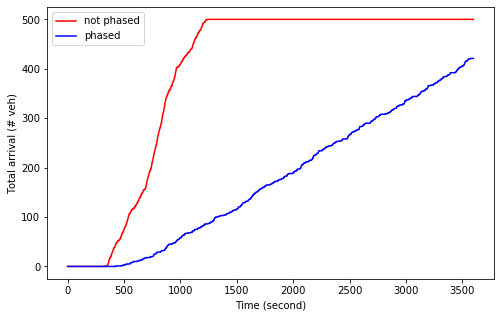

In [4]:
### Arrival plot
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(base['t_sec'], base['tot_arr'], c='red', label='not phased')
ax.plot(compare['t_sec'], compare['tot_arr'], c='blue', label='phased')
ax.set_xlabel('Time (second)')
ax.set_ylabel('Total arrival (# veh)')
plt.legend()

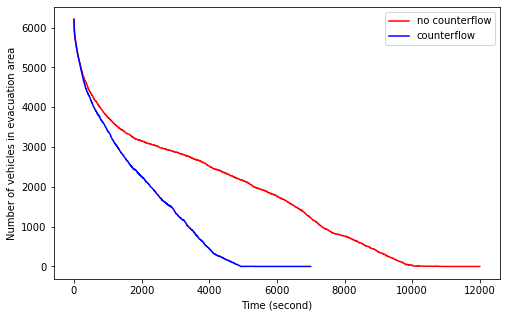

In [13]:
### Out of evacuation
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(no_cf['t_sec'], no_cf['in_evac'], c='red', label='no counterflow')
ax.plot(cf['t_sec'], cf['in_evac'], c='blue', label='counterflow')
ax.set_xlabel('Time (second)')
ax.set_ylabel('Number of vehicles in evacuation area')
plt.legend()

In [14]:
### total time in queue
print('Total time in queue without cf {} hrs, with cf {} hrs'.format(np.sum(no_cf['q_veh']/3600), np.sum(cf['q_veh']/3600)))
print('Avg time in queue without cf {} min, with cf {} min'.format(np.sum(no_cf['q_veh']/(np.max(no_cf['tot_arr'])*60)), np.sum(cf['q_veh']/(np.max(cf['tot_arr'])*60))))

Total time in queue without cf 6640.234166666667 hrs, with cf 3484.9288888888887 hrs
Avg time in queue without cf 64.20854955680902 min, with cf 33.69794251947354 min


In [21]:
### mean evacuation time per person
cf['new_arr'] = cf['tot_arr'].diff()
no_cf['new_arr'] = no_cf['tot_arr'].diff()
print('Mean evacuation time per person: without cf {} min, with cf {} min'.format(
    np.sum(no_cf['new_arr']*no_cf['t_sec']) / (np.max(no_cf['tot_arr'])*60),
    np.sum(cf['new_arr']*cf['t_sec']) / (np.max(cf['tot_arr'])*60)
))
print(np.max(no_cf['tot_arr']), np.max(cf['tot_arr']))
cf.iloc[190:195]

Mean evacuation time per person: without cf 78.45962933118453 min, with cf 47.73955143701316 min
6205 6205


,Unnamed: 0,t_sec,tot_arr,move,q_veh,q_l,r_l,in_evac,new_arr
190,190,190,2,92,5183,600,457,5022,0.0
191,191,191,2,77,5177,599,459,5016,0.0
192,192,192,3,91,5181,611,456,5011,1.0
193,193,193,3,89,5168,609,450,5009,0.0
194,194,194,3,87,5155,607,454,5003,0.0


In [10]:
no_cf_routes = pd.read_csv('outputs/initial_route_volume_a6205_cfno.csv')
cf_routes = pd.read_csv('outputs/initial_route_volume_a6205_cfmrn2_laloma_college.csv')
print(np.sum(no_cf_routes['vol']), np.sum(cf_routes['vol']))
cf_routes = pd.merge(cf_routes, no_cf_routes[['edge_id_igraph', 'vol']], how='left', on='edge_id_igraph', suffixes=['_cf', '_no_cf'])
cf_routes['cf_diff'] = cf_routes['vol_cf'] - cf_routes['vol_no_cf']
cf_routes = cf_routes.sort_values(by='cf_diff', ascending=False)
print(np.sum(cf_routes['cf_diff']))
cf_routes.to_csv('outputs/initial_route_volume_diff_a6205_cfn0_cfmrn2_laloma_college.csv', index=False)
cf_routes.head()

428436.0 428655.0
219.0


,edge_id_igraph,start_igraph,end_igraph,geometry,vol_cf,voc,vol_no_cf,cf_diff
1205,7490,2947,7539,"LINESTRING (-122.2530597 37.8570429,-122.25313...",57.0,0.060000,43.0,14.0
2845,19152,7539,14504,"LINESTRING (-122.2542598 37.8568884,-122.25428...",13.0,0.013684,3.0,10.0
3010,36034,14504,9099,"LINESTRING (-122.2544233 37.8583237,-122.25457...",12.0,0.012632,2.0,10.0
3060,15617,6128,126,"LINESTRING (-122.2449079 37.8580635,-122.24510...",47.0,0.012368,39.0,8.0
1844,320,126,125,"LINESTRING (-122.2453288 37.8580478,-122.24547...",59.0,0.031053,51.0,8.0


In [ ]:
### Arrival plot compare with Mengyan
scen_1 = 'arrival_counts_3_per_origin_0s_3600s.csv'
scen_2 = 'arrival_counts_6_per_origin_0s_3600s.csv'
scen_3 = 'arrival_counts_9_per_origin_0s_3600s.csv'

arrival_df_1 = pd.read_csv('projects/bolinas_stinson_beach/simulation_outputs/arrival_counts/' + scen_1)
arrival_df_2 = pd.read_csv('projects/bolinas_stinson_beach/simulation_outputs/arrival_counts/' + scen_2)
arrival_df_3 = pd.read_csv('projects/bolinas_stinson_beach/simulation_outputs/arrival_counts/' + scen_3)

fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(arrival_df_1['t_sec'], arrival_df_1['tot_arr'], c='green', label='3 veh per node')
ax.plot(arrival_df_2['t_sec'], arrival_df_2['tot_arr'], c='orange', label='6 veh per node')
ax.plot(arrival_df_3['t_sec'], arrival_df_3['tot_arr'], c='red', label='9 veh per node')
ax.set_xlabel('Time (second)')
ax.set_ylabel('Total arrival (# veh)')
plt.legend()

Text(0, 0.5, '# veh')

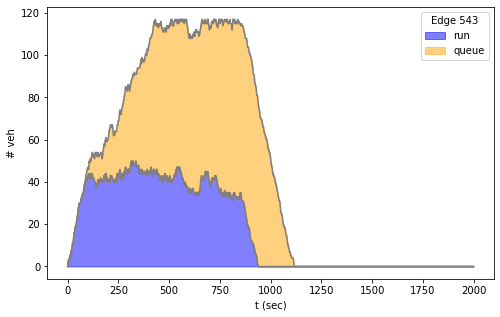

In [26]:
### occupancy and flow at key edges
scen_nm = 'track_edges_3_per_origin_nrr_0s_3600s.csv'
edge_num = 543
track_edge_info = pd.read_csv('projects/bolinas_stinson_beach/simulation_outputs/arrival_counts/' + scen_nm)
track_edge_info = track_edge_info.loc[(track_edge_info['t_sec']<2000) & (track_edge_info['edge_id_igraph']==edge_num)]

fig, ax = plt.subplots(figsize=(8, 5))
time_data = track_edge_info['t_sec']
run_data = track_edge_info['run']
queue_data = track_edge_info['queue']
x_axis_data = np.array([0]*len(time_data))
ax.plot(time_data, run_data, color='gray')
ax.plot(time_data, run_data + queue_data, color='gray')
ax.fill_between(time_data, x_axis_data, run_data, color='blue', alpha=0.5, label='run')
ax.fill_between(time_data, run_data, run_data+queue_data, color='orange', alpha=0.5, label='queue')
plt.legend(title='Edge {}'.format(edge_num))
plt.xlabel('t (sec)')
plt.ylabel('# veh')